In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [6]:
df

Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1                   6                       60             8       Normal   
2                   6                       60             8       Normal   
3                   4                       30             8        Obese   
4                   4                       30             8        Obese   
..                ...                      ...           ...          ...   
369                 9                       75             3   Overweight   
370                 9                       75             3   Overweight   
371                 9                       75             3   Overweight   
372                 9                       75             3   Overweight   
373                 9                       75             3   Overweight   

    Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0           126/83          77         4200            NaN  
1           125/80          75        10000            NaN  
2           125/80          75        10000            NaN  
3           140/90          85         3000    Sleep Apnea  
4           140/90          85         3000    Sleep Apnea  
..             ...         ...          ...            ...  
369         140/95          68         7000    Sleep Apnea  
370         140/95          68         7000    Sleep Apnea  
371         140/95          68         7000    Sleep Apnea  
372         140/95          68         7000    Sleep Apnea  
373         140/95          68         7000    Sleep Apnea  

[374 rows x 13 columns]

In [7]:
messages = [
    "I feel great today!",
    "I'm too tired to think...",
    "This is so frustrating!",
    "Just trying to stay awake.",
    "Feeling calm and motivated."
]

In [8]:
import random
df["Message"] = [random.choice(messages) for _ in range(len(df))]

In [9]:
STRESS_THRESHOLD = 7
SLEEP_QUALITY_THRESHOLD = 5
DISORDER_PENALTY = {"None": 0, "Insomnia": 2, "Sleep Apnea": 2}


In [10]:
df["Disorder Penalty"] = df["Sleep Disorder"].apply(lambda x: DISORDER_PENALTY.get(x, 2))
df["Inhibitory Score"] = df["Stress Level"] + df["Disorder Penalty"] - df["Quality of Sleep"]

In [11]:
INHIBITION_THRESHOLD = 7
df["Blocked"] = df["Inhibitory Score"] > INHIBITION_THRESHOLD

In [12]:
filtered_output = df[~df["Blocked"]][["Person ID", "Message", "Inhibitory Score", "Blocked"]]
filtered_output.head()

Person ID                      Message  Inhibitory Score  Blocked
0          1   Just trying to stay awake.                 2    False
1          2  Feeling calm and motivated.                 4    False
2          3   Just trying to stay awake.                 4    False
3          4   Just trying to stay awake.                 6    False
4          5   Just trying to stay awake.                 6    False

In [14]:
DISORDER_PENALTY = {"None": 0, "Insomnia": 2, "Sleep Apnea": 2}
INHIBITION_THRESHOLD = 7

In [13]:
def get_inhibitory_score(stress_level, sleep_quality, sleep_disorder):
    penalty = DISORDER_PENALTY.get(sleep_disorder, 2)  # Default penalty if unknown
    score = stress_level + penalty - sleep_quality
    return score

In [17]:

# STATIC ASSESSMENT OF NORMAL STRESS VS HEALTH LEVEL VS SLEEP DURATION

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='pastel')
plt.rcParams["figure.figsize"] = (10, 6)


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


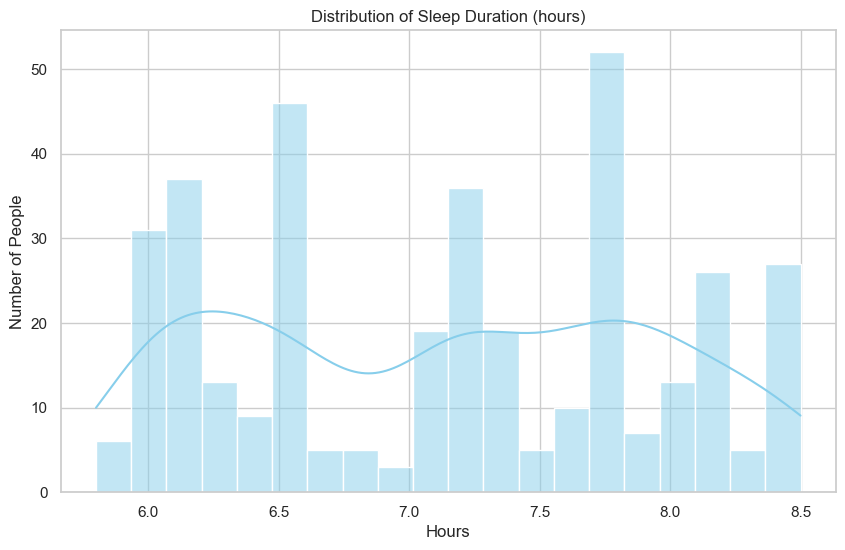

In [18]:
# STATIC GRAPH TO REPRESENT AVERAGE AMOUNT OF SLEEP REQUIRED BY HUMANS (Derived from dataset) 
sns.histplot(df['Sleep Duration'], kde=True, bins=20, color='skyblue')
plt.title("Distribution of Sleep Duration (hours)")
plt.xlabel("Hours")
plt.ylabel("Number of People")
plt.show()


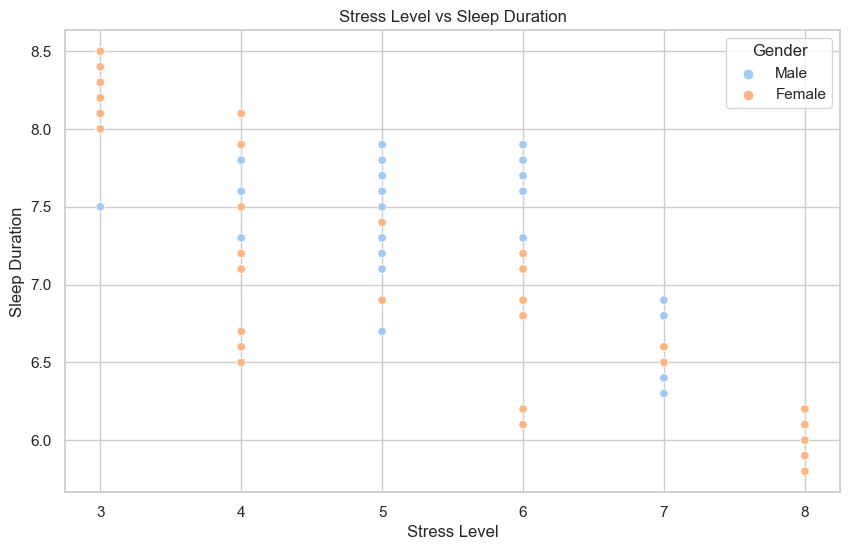

In [20]:
# STATIC GRAPH TO REPRESENT STRESS LEVEL VS SLEEP DURATION (Derived from dataset) 
sns.scatterplot(x='Stress Level', y='Sleep Duration', hue='Gender', data=df)
plt.title("Stress Level vs Sleep Duration")
plt.show()


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


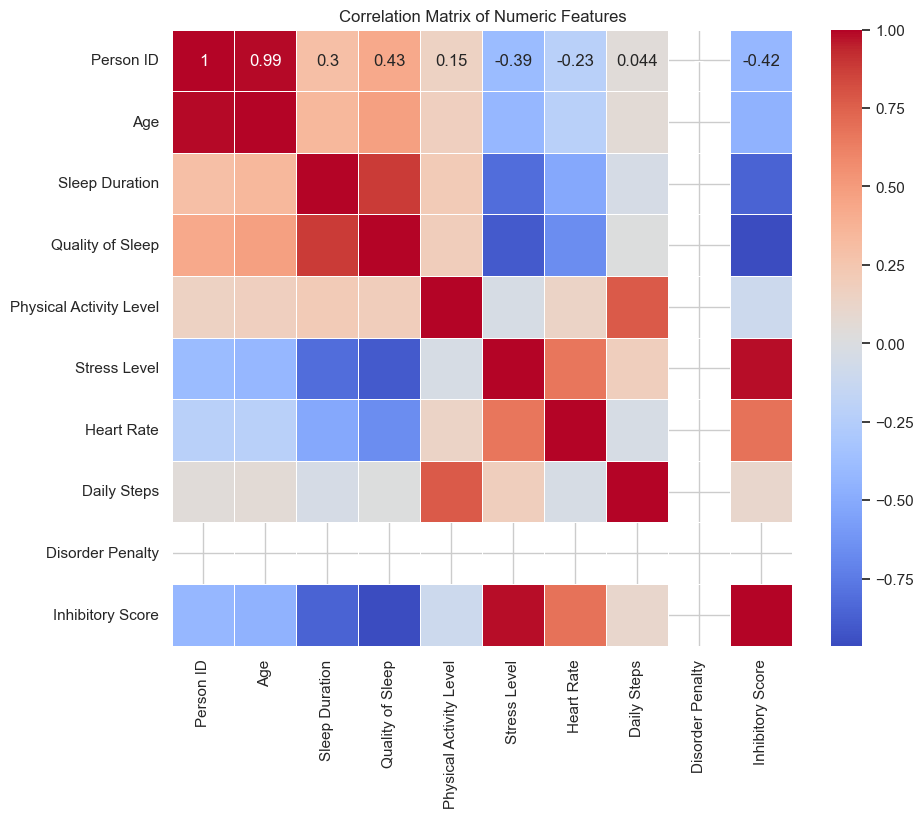

In [21]:
# STATIC GRAPH TO REPRESENT CORRELATION MATRIX FOR ALL FIELDS (Derived from dataset) 
plt.figure(figsize=(10,8))
numeric_cols = df.select_dtypes(include='number')
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15372\3480274012.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='BMI Category', y='Sleep Duration', data=df, ci=None, palette='Blues_d')


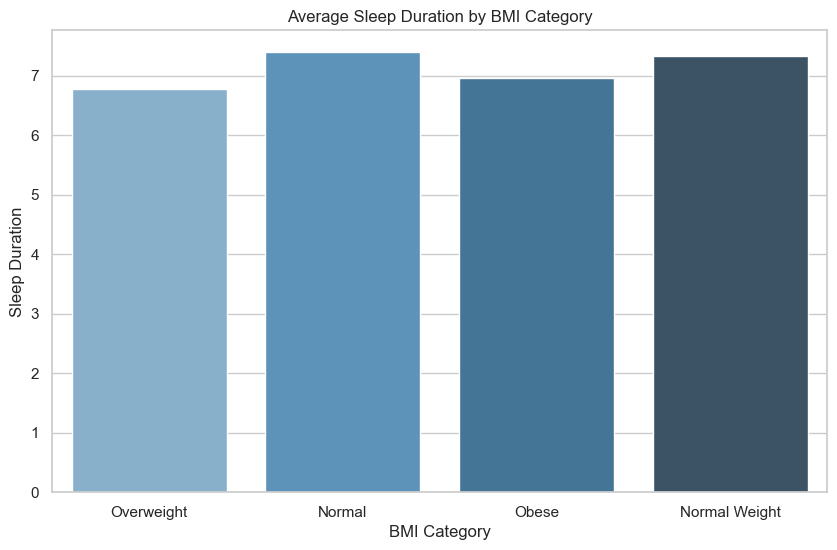

In [22]:
# STATIC GRAPH TO REPRESENT  AVERAGE SLEEP DURATION BY BMI (Derived from dataset) 
sns.barplot(x='BMI Category', y='Sleep Duration', data=df, ci=None, palette='Blues_d')
plt.title("Average Sleep Duration by BMI Category")
plt.show()


In [2]:
from ipywidgets import interact, widgets, Output

# Setup for visuals
%matplotlib inline
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

INHIBITION_THRESHOLD = 5

# Score calculation function
def get_inhibitory_score(stress_level, sleep_quality, sleep_disorder):
    score = stress_level - sleep_quality
    if sleep_disorder.lower() in ['insomnia', 'sleep apnea']:
        score += 3
    return score

out = Output()

def dynamic_filter(message, stress_level, sleep_quality, sleep_disorder):
    with out:
        out.clear_output()
        
        score = get_inhibitory_score(stress_level, sleep_quality, sleep_disorder)
        blocked = score > INHIBITION_THRESHOLD

        # Print results
        print("=== Emotion-Inhibitory Filtering System ===\n")
        print(f"Message: {message}")
        print(f"Inhibitory Score: {score}")
        print(f"Blocked: {'Yes 🚫' if blocked else 'No ✅'}\n")

        # Bar chart
        labels = ['Stress Level', 'Sleep Quality', 'Inhibitory Score']
        values = [stress_level, sleep_quality, score]
        color_map = ['orange', 'lightgreen', 'red' if blocked else 'green']

        plt.bar(labels, values, color=color_map)
        plt.title("Emotion Metrics Overview")
        plt.ylim(0, 15)
        plt.axhline(y=INHIBITION_THRESHOLD, color='black', linestyle='--', label='Block Threshold')
        plt.legend()
        plt.show()

interact(
    dynamic_filter,
    message=widgets.Text(value="I'm feeling great!", description='Message:'),
    stress_level=widgets.IntSlider(value=3, min=1, max=10, description='Stress:'),
    sleep_quality=widgets.IntSlider(value=7, min=1, max=10, description='Sleep:'),
    sleep_disorder=widgets.Dropdown(options=["None", "Insomnia", "Sleep Apnea"], description='Disorder:')
)

display(out)


interactive(children=(Text(value="I'm feeling great!", description='Message:'), IntSlider(value=3, description…

Output()